         Date    Open   High    Low   Close    Volume  Adj Close
0  2012-09-12  666.85  669.9  656.0  669.79  25410600     669.79
--------
            Date   Open   High    Low   Close    Volume  Adj Close
3174  2000-02-01  104.0  105.0  100.0  100.25  11380000      24.96
--------
680.44
--------
128.217420472


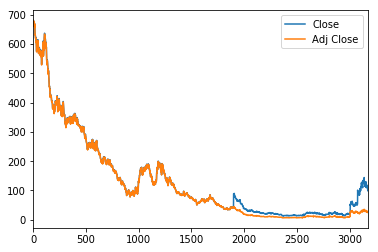

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def test_run():
	df = pd.read_csv("../data/AAPL.csv")
	print df.head(1)
	print "--------"
	print df.tail(1)
	print "--------"
	print df['Close'].max()
	print "--------"
	print df['Adj Close'].mean()
	df[['Close','Adj Close']].plot()
	plt.show()

if __name__ == "__main__":
	test_run()

In [2]:
"""Utility functions"""

import os
import pandas as pd

def symbol_to_path(symbol, base_dir="../data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        symbol_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(symbol_path,index_col='Date',parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
        
    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    #print df.ix['2010-01-01':'2010-01-31']
    #print df['GOOG']
    #print df[['GOOG','GLD']]
    print df.ix['2010-01-01':'2010-01-31',['GOOG','GLD']]



if __name__ == "__main__":
    test_run()

              GOOG     GLD
2010-01-04  626.75  109.80
2010-01-05  623.99  109.70
2010-01-06  608.26  111.51
2010-01-07  594.10  110.82
2010-01-08  602.02  111.37
2010-01-11  601.11  112.85
2010-01-12  590.48  110.49
2010-01-13  587.09  111.54
2010-01-14  589.85  112.03
2010-01-15  580.00  110.86
2010-01-19  587.62  111.52
2010-01-20  580.41  108.94
2010-01-21  582.98  107.37
2010-01-22  550.01  107.17
2010-01-25  540.00  107.48
2010-01-26  542.42  107.56
2010-01-27  542.10  106.53
2010-01-28  534.29  106.48
2010-01-29  529.94  105.96


/home/vinay/cs7646/ml4t-venv/lib/python2.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


/home/vinay/cs7646/ml4t-venv/lib/python2.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


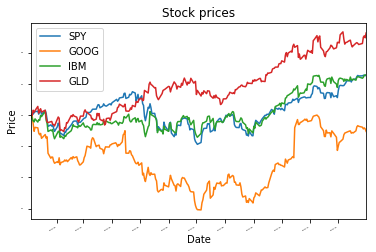

In [3]:
"""Utility functions"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="../data"):
	"""Return CSV file path given ticker symbol."""
	return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
	"""Read stock data (adjusted close) for given symbols from CSV files."""
	df = pd.DataFrame(index=dates)
	if 'SPY' not in symbols:  # add SPY for reference, if absent
	    symbols.insert(0, 'SPY')

	for symbol in symbols:
	    # TODO: Read and join data for each symbol
	    symbol_path = symbol_to_path(symbol)
	    df_temp = pd.read_csv(symbol_path,index_col='Date',parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
	    df_temp = df_temp.rename(columns={'Adj Close':symbol})
	    df = df.join(df_temp)
	    if symbol == 'SPY':
	        df = df.dropna(subset=['SPY'])
	    
	return df


def test_run():
	# Define a date range
	dates = pd.date_range('2010-01-01', '2010-12-31')

	# Choose stock symbols to read
	symbols = ['GOOG', 'IBM', 'GLD']
	
	# Get stock data
	df = get_data(symbols, dates)
	#print df.ix['2010-01-01':'2010-01-31']
	#print df['GOOG']
	#print df[['GOOG','GLD']]
	#print df.ix['2010-01-01':'2010-01-31',['GOOG','GLD']]
	
	plot(normalize_data(df))


def plot(df, title="Stock prices"):
	ax = df.plot(title=title,fontsize=2)
	ax.set_xlabel("Date")
	ax.set_ylabel("Price")
	plt.show()

def normalize_data(df):
	return df/df.ix[0]

if __name__ == "__main__":
	test_run()